In [ ]:
import requests
from IPython.display import JSON
import pandas as pd
import numpy as np 
import time

# Visualization
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

# Panel/hvplot (holoviz)
import panel as pn
pn.extension()
import param
import hvplot.pandas

# API secret
from lib.api_secret import API_KEY
pn.extension('plotly', 'tabulator', sizing_mode="stretch_width")

Column(sizing_mode='stretch_width')
    [0] Markdown(str, sizing_mode='stretch_width')
    [1] Str(None, height_policy='fit', max_width=600, sizing_mode='stretch_width')
    [2] Row(sizing_mode='stretch_width')
        [0] ParamFunction(function, sizing_mode='stretch_width')
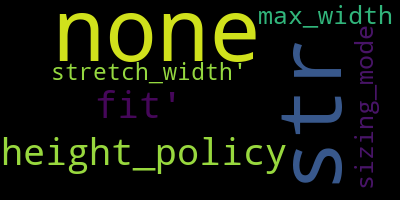

In [26]:
class AudioDashboard(param.Parameterized):
    data = param.Dict()
    file_input = param.Parameter()
    
    def __init__(self, **params):
        super().__init__(file_input=pn.widgets.TextInput(), **params)
        self.transcript = pn.pane.Str(max_width = 600, height_policy = "fit")
        self.download = pn.widgets.FileDownload(name="Download transcript", filename="transcript.txt", callback=self._download_callback, button_type="primary")

    @pn.depends("file_input.value", watch=True)
    def _parse_file_input(self):
        print("parse input ")
        print(self.file_input)
        value = self.file_input.value
        if value:
            print("in parse")
            self.data = self.get_and_analyze_transcript()
            
        else:
            print("error")

    @pn.depends('data', watch=True)
    def get_transcript(self):
        print("get transcript ")
        self.transcript.object = self.data["text"]
        
        
    def _download_callback(self):
        print("download")
        if self.data is not None:
            buffer = StringIO()
            buffer.write(self.data["text"])
            buffer.seek(0)
            print("return buffer")

            return buffer  
        else:
            return
        
        
    def poll(self):
        polling_endpoint = transcript_endpoint + '/' + self.transcript_id
        polling_response = requests.get(polling_endpoint, headers=self.headers)
        self.data = polling_response.json()
        
    def get_and_analyze_transcript(self):
        audio_url = self.file_input.value
                
        if audio_url:
            print("yes")
            API_KEY = API_KEY

            endpoint = "https://api.assemblyai.com/v2/transcript"
            audio_url_json = {
                "audio_url": audio_url,
                "sentiment_analysis": True,
                "auto_highlights": True,
                "iab_categories": True,
                "auto_chapters": True
            }
            headers = {
                "authorization": API_KEY,
                "content-type": "application/json"
            }
            transcript_response = requests.post(endpoint, json=audio_url_json, headers=headers)

            result_endpoint = endpoint + '/' + transcript_response.json()["id"]
            headers_auth = {
                "authorization": API_KEY,
            }
            response = requests.get(result_endpoint, headers=headers_auth)
            while response.json()['status'] != "completed":
                response = requests.get(result_endpoint, headers=headers_auth)
                time.sleep(3)
                
            return response.json()

        else:
            print("no")
            return
        
    def view(self):
        # Create interactive slider
        class Controller(param.Parameterized):
            word_slider = param.Integer(30, bounds=(5, 50), step=5)

        controller = Controller()

        @pn.depends(controller.param.word_slider, watch=True)    
        def update_wordcloud(num_words):
            # Word cloud plot
            wordcloud = WordCloud(background_color='black', stopwords = set(STOPWORDS), max_words = 20,
                                  colormap='viridis', collocations=False).generate(str(self.transcript).lower())

            wordcloud_plot = px.imshow(wordcloud) 
            # Remove labels on axes
            wordcloud_plot.update_xaxes(showticklabels=False)
            wordcloud_plot.update_yaxes(showticklabels=False)
            return wordcloud_plot
        return pn.Column(
            "## Transcript",
            self.transcript,
            pn.Row(update_wordcloud, title="Common Words"))
    
audio_app = AudioDashboard()

audio_app_view = audio_app.view()
audio_app_view

Traceback (most recent call last):
 File "C:\Users\vin39\Documents\Python\audio_analyzer_assemblyai\venv\lib\site-packages\pyviz_comms\__init__.py", line 338, in _handle_msg
 self._on_msg(msg)
 File "C:\Users\vin39\Documents\Python\audio_analyzer_assemblyai\venv\lib\site-packages\panel\viewable.py", line 292, in _on_msg
 doc.unhold()
 File "C:\Users\vin39\Documents\Python\audio_analyzer_assemblyai\venv\lib\site-packages\bokeh\document\document.py", line 799, in unhold
 self.callbacks.unhold()
 File "C:\Users\vin39\Documents\Python\audio_analyzer_assemblyai\venv\lib\site-packages\bokeh\document\callbacks.py", line 396, in unhold
 self.trigger_on_change(event)
 File "C:\Users\vin39\Documents\Python\audio_analyzer_assemblyai\venv\lib\site-packages\bokeh\document\callbacks.py", line 373, in trigger_on_change
 invoke_with_curdoc(doc, event.callback_invoker)
 File "C:\Users\vin39\Documents\Python\audio_analyzer_assemblyai\venv\lib\site-packages\bokeh\document\callbacks.py", line 408, in invoke_with_curdoc
 return f()
 File "C:\Users\vin39\Documents\Python\audio_analyzer_assemblyai\venv\lib\site-packages\bokeh\util\callback_manager.py", line 191, in invoke
 callback(attr, old, new)
 File "C:\Users\vin39\Documents\Python\audio_analyzer_assemblyai\venv\lib\site-packages\panel\reactive.py", line 392, in _comm_change
 self._schedule_change(doc, comm)
 File "C:\Users\vin39\Documents\Python\audio_analyzer_assemblyai\venv\lib\site-packages\panel\reactive.py", line 376, in _schedule_change
 self._change_event(doc)
 File "C:\Users\vin39\Documents\Python\audio_analyzer_assemblyai\venv\lib\site-packages\panel\reactive.py", line 370, in _change_event
 self._process_events(events)
 File "C:\Users\vin39\Documents\Python\audio_analyzer_assemblyai\venv\lib\site-packages\panel\reactive.py", line 315, in _process_events
 self.param.update(**self_events)
 File "C:\Users\vin39\Documents\Python\audio_analyzer_assemblyai\venv\lib\site-packages\param\parameterized.py", line 1898, in update
 self_._batch_call_watchers()
 File "C:\Users\vin39\Documents\Python\audio_analyzer_assemblyai\venv\lib\site-packages\param\parameterized.py", line 2059, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "C:\Users\vin39\Documents\Python\audio_analyzer_assemblyai\venv\lib\site-packages\param\parameterized.py", line 2021, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "C:\Users\vin39\Documents\Python\audio_analyzer_assemblyai\venv\lib\site-packages\param\parameterized.py", line 669, in caller
 return function()
 File "C:\Users\vin39\Documents\Python\audio_analyzer_assemblyai\venv\lib\site-packages\param\parameterized.py", line 407, in _depends
 return func(*args, **kw)
 File "C:\Users\vin39\AppData\Local\Temp\ipykernel_14220\242799801.py", line 17, in _parse_file_input
 self.data = self.get_and_analyze_transcript()
 File "C:\Users\vin39\AppData\Local\Temp\ipykernel_14220\242799801.py", line 51, in get_and_analyze_transcript
 API_KEY = API_KEY
UnboundLocalError: local variable 'API_KEY' referenced before assignment

FastListTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] TemplateActions()
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [1441156506192] Column(sizing_mode='stretch_both')
        [0] Markdown(str, sizing_mode='stretch_width')
        [1] Column(sizing_mode='stretch_width')
            [0] Markdown(str, sizing_mode='stretch_width')
            [1] Str(None, height_policy='fit', max_width=600, sizing_mode='stretch_width')
            [2] Row(sizing_mode='stretch_width')
                [0] ParamFunction(function, sizing_mode='stretch_width')
    [1441115785920] Markdown(str, sizing_mode='stretch_width')
    [1441155560736] TextInput(sizing_mode='stretch_width')
    [1441156676288] FileDownload(button_type='primary', callback=<bound method AudioDashboa..., filename='transcript.txt', label='Download transcript.txt', name='Download transcript', sizing_mode='stretch_width')
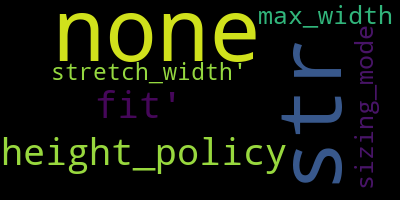

In [27]:

description = """
This is my app :)
"""

component = pn.Column(
    description,
    audio_app_view,
    sizing_mode='stretch_both'
)
component

template = pn.template.FastListTemplate(
    title='Audio Content Explorer', 
    sidebar=[pn.pane.Markdown("### Input a link:"), 
             audio_app.file_input, 
             audio_app.download],
    main=[component],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)

template.servable()